In [1]:
import aqdatac
aqdatac.login('huangchunyang', password='20020308hd')

In [2]:
aqdatac.current_session()

aqdatac: version 0.2.3
current user: huangchunyang
current session expires at: 2024-08-09 10:52:48


In [3]:
aqdatac.accessible_tables()

{'aindexcsi500weight': ['*'],
 'aindexhs300closeweight': ['*'],
 'aindexhs300freeweight': ['*'],
 'ashareeodprices': ['2009-01-01, 2019-12-31'],
 'cftick': ['2019-01-01,2019-07-01'],
 'cfuturescalendar': ['*'],
 'chinaetfpchredmlist': ['*'],
 'chinaetfpchredmmembers': ['*'],
 'csbar_1d': ['2009-01-01, 2019-12-31'],
 'csbar_30m': ['2015-01-01, 2019-12-31'],
 'csdate': ['*'],
 'csinfo': ['*'],
 'csord': ['2019-01-01,2019-07-01'],
 'cstick': ['2019-01-01,2019-07-01'],
 'cstra': ['2019-01-01,2019-07-01']}

In [4]:
df = aqdatac.get_data("csinfo",row_filter="producttype='a'") 

In [5]:
df = df[df['status'] == 'active']

In [6]:
df

,sym,name,producttype,status,listeddate,delisteddate,issue_price
0,000001.SZ,平安银行,a,active,1991-04-03,<NA>,40.0
1,000002.SZ,万科A,a,active,1991-01-29,<NA>,1.0
3,000004.SZ,国华网安,a,active,1990-12-01,<NA>,1.0
4,000005.SZ,ST星源,a,active,1990-12-10,<NA>,10.0
5,000006.SZ,深振业A,a,active,1992-04-27,<NA>,10.0
...,...,...,...,...,...,...,...
5353,688799.SH,华纳药厂,a,active,2021-07-13,<NA>,30.82
5354,688800.SH,瑞可达,a,active,2021-07-22,<NA>,15.02
5355,688819.SH,天能股份,a,active,2021-01-18,<NA>,41.79
5356,688981.SH,中芯国际,a,active,2020-07-16,<NA>,27.46


In [7]:
import pandas as pd
start_date_str, end_date_str = "2019-06-02", "2019-07-01"
start_date, end_date = pd.to_datetime(start_date_str), pd.to_datetime(end_date_str)
sym_list = df['sym'].tolist()
type(sym_list)

list

In [8]:
df_30m = aqdatac.get_data("csbar_30m", start_date, end_date, sym_list)
df_30m

,date,datetime,sym,open,high,low,close,volume,turnover,tradecount
0,2019-06-03,2019-06-03 10:00:00,000001.SZ,12.22,12.33,12.17,12.26,20006023.0,245392316.66,8136.0
1,2019-06-03,2019-06-03 10:00:00,000002.SZ,26.81,27.02,26.55,26.75,7012521.0,187925067.6,6373.0
2,2019-06-03,2019-06-03 10:00:00,000004.SZ,21.41,21.66,21.3,21.4,95868.0,2052419.48,298.0
3,2019-06-03,2019-06-03 10:00:00,000005.SZ,3.0,3.04,3.0,3.02,858400.0,2591290.0,343.0
4,2019-06-03,2019-06-03 10:00:00,000006.SZ,5.49,5.53,5.44,5.48,1866031.0,10232593.88,787.0
...,...,...,...,...,...,...,...,...,...,...
556486,2019-07-01,2019-07-01 15:00:00,603991.SH,20.12,20.27,20.1,20.2,99141.0,2003647.02,216.0
556487,2019-07-01,2019-07-01 15:00:00,603993.SH,4.02,4.03,4.02,4.03,14641205.0,58948991.65,3600.0
556488,2019-07-01,2019-07-01 15:00:00,603997.SH,7.88,7.91,7.86,7.91,365350.0,2879168.5,368.0
556489,2019-07-01,2019-07-01 15:00:00,603998.SH,7.39,7.41,7.36,7.41,3214900.0,23729887.0,1609.0


In [9]:
df_30m_0 = df_30m[df_30m['datetime'].dt.time == pd.to_datetime('10:00:00').time()] 
print(len(df_30m_0))

69564


In [10]:
df_30m_0_trade = df_30m_0[df_30m_0['volume']!=0]
print(len(df_30m_0_trade))

69564


In [11]:
sym_list_top100 = df_30m_0_trade[['sym', 'turnover']].groupby('sym').mean().nlargest(100, 'turnover').index

In [12]:
sym_list_top100

Index(['601318.SH', '600519.SH', '000063.SZ', '000858.SZ', '600030.SH',
       '300059.SZ', '601688.SH', '000651.SZ', '002415.SZ', '002945.SZ',
       '002057.SZ', '600111.SH', '600036.SH', '600547.SH', '000723.SZ',
       '002157.SZ', '601066.SH', '000876.SZ', '600352.SH', '600206.SH',
       '000831.SZ', '603019.SH', '002049.SZ', '002237.SZ', '300748.SZ',
       '002547.SZ', '002463.SZ', '600887.SH', '601881.SH', '600837.SH',
       '000333.SZ', '600392.SH', '600570.SH', '600536.SH', '300033.SZ',
       '600276.SH', '002902.SZ', '600446.SH', '601899.SH', '002002.SZ',
       '600366.SH', '002481.SZ', '000725.SZ', '601398.SH', '002041.SZ',
       '601166.SH', '000970.SZ', '300184.SZ', '000977.SZ', '002939.SZ',
       '000568.SZ', '000795.SZ', '300498.SZ', '000001.SZ', '601162.SH',
       '002230.SZ', '002467.SZ', '600487.SH', '002714.SZ', '600217.SH',
       '300292.SZ', '600259.SH', '600585.SH', '002436.SZ', '600050.SH',
       '300136.SZ', '600460.SH', '300779.SZ', '300127.SZ', '0021

In [13]:
df_valid = df_30m_0_trade[df_30m_0_trade['sym'].isin(sym_list_top100)]
df_valid['date'] = pd.to_datetime(df_valid['date'])
df_valid

/tmp/ipykernel_16161/1721166646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['date'] = pd.to_datetime(df_valid['date'])


,date,datetime,sym,open,high,low,close,volume,turnover,tradecount
0,2019-06-03,2019-06-03 10:00:00,000001.SZ,12.22,12.33,12.17,12.26,20006023.0,245392316.66,8136.0
1,2019-06-03,2019-06-03 10:00:00,000002.SZ,26.81,27.02,26.55,26.75,7012521.0,187925067.6,6373.0
43,2019-06-03,2019-06-03 10:00:00,000063.SZ,29.3,29.61,29.0,29.48,35389213.0,1039825621.29,33214.0
65,2019-06-03,2019-06-03 10:00:00,000333.SZ,49.79,50.99,49.75,50.82,7106639.0,358632212.21,10479.0
147,2019-06-03,2019-06-03 10:00:00,000568.SZ,70.8,71.98,70.17,70.91,2873860.0,204248315.51,7721.0
...,...,...,...,...,...,...,...,...,...,...
531573,2019-07-01,2019-07-01 10:00:00,601881.SH,12.9,12.9,12.5,12.65,49450148.0,630066994.68,20932.0
531579,2019-07-01,2019-07-01 10:00:00,601899.SH,3.65,3.75,3.62,3.74,123225480.0,453675531.24,21002.0
531624,2019-07-01,2019-07-01 10:00:00,603019.SH,35.39,36.41,35.3,36.35,44329458.0,1588882519.62,42699.0
531776,2019-07-01,2019-07-01 10:00:00,603327.SH,26.95,27.17,26.55,27.0,6191017.0,166723668.04,9338.0


In [14]:
df_valid_sort = df_valid.sort_values(by=['sym', 'date'])
df_valid_sort

,date,datetime,sym,open,high,low,close,volume,turnover,tradecount
0,2019-06-03,2019-06-03 10:00:00,000001.SZ,12.22,12.33,12.17,12.26,20006023.0,245392316.66,8136.0
27783,2019-06-04,2019-06-04 10:00:00,000001.SZ,11.89,11.94,11.69,11.69,25048900.0,295894923.9,11017.0
55575,2019-06-05,2019-06-05 10:00:00,000001.SZ,11.97,12.03,11.92,11.97,20279369.0,242676580.03,8313.0
83367,2019-06-06,2019-06-06 10:00:00,000001.SZ,11.97,12.05,11.91,11.99,8227063.0,98427270.45,4854.0
111183,2019-06-10,2019-06-10 10:00:00,000001.SZ,12.01,12.15,11.98,12.12,24792619.0,299731165.42,8525.0
...,...,...,...,...,...,...,...,...,...,...
420502,2019-06-25,2019-06-25 10:00:00,603915.SH,22.65,24.04,22.63,23.4,15294045.0,360169095.74,22510.0
448365,2019-06-26,2019-06-26 10:00:00,603915.SH,22.91,23.43,22.56,22.95,8900608.0,204373197.11,13534.0
476230,2019-06-27,2019-06-27 10:00:00,603915.SH,23.63,24.23,23.3,23.62,7670968.0,182651705.66,12153.0
504115,2019-06-28,2019-06-28 10:00:00,603915.SH,23.66,24.6,23.44,24.35,9848858.0,238193093.37,14801.0


In [15]:
# df_valid_sort.groupby('sym')['volume'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df_valid_sort['volume_prev_5d_avg'] = df_valid_sort.groupby('sym')['volume'].apply(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean()).reset_index(level=0, drop=True)

In [16]:
df_valid_sort

,date,datetime,sym,open,high,low,close,volume,turnover,tradecount,volume_prev_5d_avg
0,2019-06-03,2019-06-03 10:00:00,000001.SZ,12.22,12.33,12.17,12.26,20006023.0,245392316.66,8136.0,NaN
27783,2019-06-04,2019-06-04 10:00:00,000001.SZ,11.89,11.94,11.69,11.69,25048900.0,295894923.9,11017.0,2.000602e+07
55575,2019-06-05,2019-06-05 10:00:00,000001.SZ,11.97,12.03,11.92,11.97,20279369.0,242676580.03,8313.0,2.252746e+07
83367,2019-06-06,2019-06-06 10:00:00,000001.SZ,11.97,12.05,11.91,11.99,8227063.0,98427270.45,4854.0,2.177810e+07
111183,2019-06-10,2019-06-10 10:00:00,000001.SZ,12.01,12.15,11.98,12.12,24792619.0,299731165.42,8525.0,1.839034e+07
...,...,...,...,...,...,...,...,...,...,...,...
420502,2019-06-25,2019-06-25 10:00:00,603915.SH,22.65,24.04,22.63,23.4,15294045.0,360169095.74,22510.0,1.071640e+07
448365,2019-06-26,2019-06-26 10:00:00,603915.SH,22.91,23.43,22.56,22.95,8900608.0,204373197.11,13534.0,1.371987e+07
476230,2019-06-27,2019-06-27 10:00:00,603915.SH,23.63,24.23,23.3,23.62,7670968.0,182651705.66,12153.0,1.544539e+07
504115,2019-06-28,2019-06-28 10:00:00,603915.SH,23.66,24.6,23.44,24.35,9848858.0,238193093.37,14801.0,1.667114e+07


In [17]:
df_valid_sort_dropna = df_valid_sort.dropna()
print(len(df_valid_sort_dropna))

1869


In [18]:
df_valid_sort_dropna[['date', 'sym', 'volume', 'volume_prev_5d_avg']].reset_index(drop=True).to_csv('./valid_set.csv')

In [19]:
volume = df_valid_sort_dropna['volume']
volume_prev_5d_avg = df_valid_sort_dropna['volume_prev_5d_avg']
delta_volume = (volume_prev_5d_avg - volume) / volume
delta_volume_percent = round(delta_volume * 100, 2)

In [20]:
df_valid_sort_dropna.iloc[delta_volume_percent.argmax()-5: delta_volume_percent.argmax()+2]

,date,datetime,sym,open,high,low,close,volume,turnover,tradecount,volume_prev_5d_avg
29232,2019-06-04,2019-06-04 10:00:00,300127.SZ,15.31,15.7,15.2,15.26,3085200.0,47728833.0,3650.0,4.334500e+06
57023,2019-06-05,2019-06-05 10:00:00,300127.SZ,16.0,16.38,16.0,16.38,6034747.0,98186084.86,3024.0,3.709850e+06
84816,2019-06-06,2019-06-06 10:00:00,300127.SZ,16.35,18.02,16.01,18.02,14029195.0,239544797.64,10123.0,4.484816e+06
112632,2019-06-10,2019-06-10 10:00:00,300127.SZ,19.82,19.82,19.7,19.82,20800717.0,412208715.94,11501.0,6.870910e+06
140415,2019-06-11,2019-06-11 10:00:00,300127.SZ,21.8,21.8,21.38,21.8,8737879.0,190250267.32,6039.0,9.656872e+06
168207,2019-06-12,2019-06-12 10:00:00,300127.SZ,23.98,23.98,23.98,23.98,461100.0,11057178.0,378.0,1.053755e+07
195991,2019-06-13,2019-06-13 10:00:00,300127.SZ,25.8,26.38,25.5,26.05,32005895.0,835719335.53,26291.0,1.001273e+07


raw:  1869 sorted:  1864


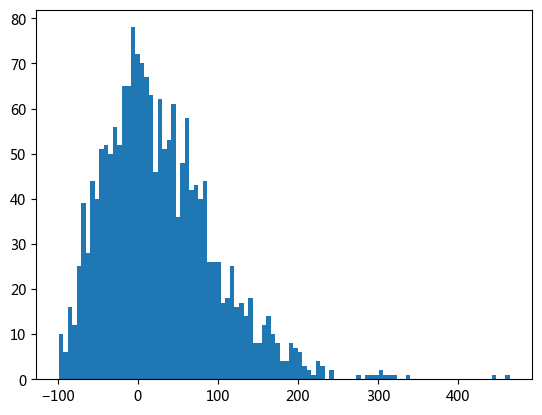

In [21]:
from matplotlib import pyplot as plt
sort = delta_volume_percent < 500
print('raw: ', len(delta_volume_percent), 'sorted: ', len(delta_volume_percent[sort]))
plt.hist(delta_volume_percent[sort], bins=100)
plt.show()